<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/Raster_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 213kB/s 


In [2]:
import os
import urllib
import urllib.parse
import requests

def get_filename(url):
    """
    Parses filename from given url
    """
    if url.find('/'):
        return url.rsplit('/', 1)[1]

# Filepaths
outdir = r"content/"

# File locations
url_list = ["https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif"]

# Create folder if it does no exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

# Download files
for url in url_list:
    # Parse filename
    fname = get_filename(url)
    outfp = os.path.join(outdir, fname)
    # Download the file if it does not exist already
    if not os.path.exists(outfp):
        print("Downloading", fname)
        r = urllib.request.urlretrieve(url, outfp)

In [4]:
import rasterio
import numpy as np
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Data dir
data_dir = "/content/content"

# Filepath
fp = os.path.join(data_dir, "Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

# Open the raster file in read mode
raster = rasterio.open(fp)

36.29418775547201
35.0946303937776
<class 'numpy.ndarray'>


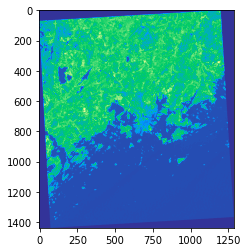

In [5]:
# Read red channel (channel number 3)
red = raster.read(3)
# Read NIR channel (channel number 4)
nir = raster.read(4)

# Calculate some stats to check the data
print(red.mean())
print(nir.mean())
print(type(nir))

# Visualize
show(nir, cmap='terrain')

In [6]:
# Convert to floats
red = red.astype('f4')
nir = nir.astype('f4')
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [8]:
# Calculate NDVI using numpy arrays
ndvi = (nir - red) / (nir + red)

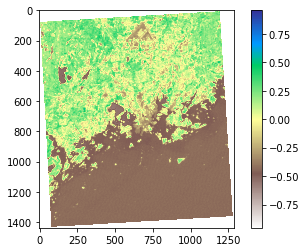

In [9]:
%matplotlib inline
# Plot the NDVI
plt.imshow(ndvi, cmap='terrain_r')
# Add colorbar to show the index
plt.colorbar()